# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 2: Pre-Processing, Initial Modelling

Author: Patrick Smith

Date: 24/03/2024

Contact: patrick.b.smith@gmail.com

         *                 *                  *              *
                                                      *             *
                        *            *                             ___
  *               *                                          |     | |
        *              _________##                 *        / \    | |
                      @\\\\\\\\\##    *     |              |--o|===|-|
  *                  @@@\\\\\\\\##\       \|/|/            |---|   |p|
                    @@ @@\\\\\\\\\\\    \|\\|//|/     *   /     \  |b|
             *     @@@@@@@\\\\\\\\\\\    \|\|/|/         |  U    | |s|
                  @@@@@@@@@----------|    \\|//          |  K    |=| |                                                                                                                       

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Region                         | World region of the country of nationality for the individual.              | object   |
| Return type group              | Grouped type of return (enforced, voluntary, refused entry at port).         | object   |
| Return type                    | Specific type of return (enforced, voluntary, refused entry).               | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Number of returns              | Count of returns.                                                           | float64  |
| Visa type group                | Grouped type of sponsored work visa applied for.                            | object   |
| Visa type subgroup             | Detailed type of sponsored work visa applied for.                           | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Case type                      | Type of case (asylum, resettlement).                                       | object   |
| Case outcome group             | Grouped outcome of the case (granted protection, grant of other leave, refused, withdrawn). | object   |
| UASC                           | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child.       | object   |
| Host Country                   | Country where the individual first sought asylum for resettlement cases.    | object   |
| Location of application        | Location where the application was submitted.                               | object   |
| Applications                   | Number of applications made.                                               | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| SOC code                       | Standard Occupational Classification code.                                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Category of leave group        | Grouped category of extension applied for (work, study, family, other).     | object   |
| Category of leave              | Category of extension applied for.                                         | object   |
| Category of leave subgroup     | Detailed category of extension applied for.                                | object   |
| Current category of leave group| Grouped current category of leave (work, study, family, other).            | object   |
| Current category of leave      | Current category of leave.                                                 | object   |
| Previous category of leave group | Grouped previous category of leave (work, study, family, other).         | object   |
| Previous category of leave     | Previous category of leave.                                                | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| UK Region                      | The UK region in which the citizenship ceremony took place.                | object   |

## Table of Contents - Book 2

[Data Loading, Objectives, and Initial Clean ](#Load) 

[Initial Preprocessing and Cleaning](#Initial_Preprocessing) 

[Initial Dataset Summary](#Dataset_summary)

[Preprocessing: Applications, Decisions, and Grants](#ADG) 

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

[Baseline Modelling](#B_Model)

[Modelling: LogisticRegression ](#B_Modelling)

[Modelling: Pipeline](#Pipeline)

[Modelling: Evaluation](#Evaluation)


## Data Loading

<div id='Load'></div>

In [77]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings

## Next Objective



1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Other columns of importance; Age, Sex, 
4)  variables by imputation
5)   improves the dataset's quality by reducing the number of 'unknown' entries
6) Modelling
7) 
8) Split the data into train and test sets
9) transform the positive and negative review columns using a CountVectorizer
10) Do an EDA (exploratory data analysis)
11) Plots and univariate and bivariate distribution
12) Insights and conclusions to shareholders

After, we will move on to data preprocessing and modelling on the other notebook.

Displaying max columns

In [78]:
pd.options.display.max_columns = None

Reading the CSV file exported from the EDA file (book 1) and setting as df (dataframe)

In [81]:
df_combined = pd.read_csv(r'C:\Users\patri\Downloads\df_combined_EDA1.csv', low_memory=False)

Displaying a sample to see what the columns are like

In [80]:
df_combined.sample(5)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region
814327,2021,4,Ukraine,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,1.0,3545 - sales accounts and business development...,information and communications,associate professional and technical occupations,business and public service associate professi...,"sales, marketing and related associate profess...",sales accounts and business development managers,Europe
429807,2014,1,Georgia,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,Other,All,Issued,14.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Europe
835483,2022,1,Georgia,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.0,0.0,"3413 - actors, entertainers and presenters","arts, entertainment and recreation",associate professional and technical occupations,"culture, media and sports occupations","artistic, literary and media occupations","actors, entertainers and presenters",Europe
969070,2023,2,Uganda,Africa Sub-Saharan,NaN,NaN,18 to 29,1,NaN,NaN,NaN,Main Applicant,NaN,0.0,NaN,NaN,Non-UASC,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Africa
319714,2011,3,Syria,Middle East,NaN,NaN,18 to 29,1,NaN,NaN,NaN,Main Applicant,NaN,0.0,NaN,NaN,Non-UASC,NaN,0.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,Middle East


Ok we have a lot of unknowns and 0s. We need to look into this. Otherwise our models and predictions won't be accurate.

Checking if there are any nulls

In [82]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.895043
Return type                 76.895043
Age                          0.000000
Sex                          0.000000
Return destination group    76.895043
Number of returns           76.895043
Visa type group             70.034898
Applicant type              52.157214
Case outcome                58.921874
Decisions                    0.000000
Case type                   88.886977
Case outcome group          88.886977
UASC                        82.122316
Application type            87.884675
Grants                       0.000000
Applications                 0.000000
Occupation                  83.824712
Industry                    83.824712
Occ. major group            83.824712
Occ. sub-major group        83.824712
Occ. minor group            83.824712
Occ. unit group             83.824712
General_Regi

Still a lot of nulls. Lets check the shape, percentage of nulls.

In [83]:
df_combined.isna().sum()/df_combined.shape[0]*100

Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group           76.895043
Return type                 76.895043
Age                          0.000000
Sex                          0.000000
Return destination group    76.895043
Number of returns           76.895043
Visa type group             70.034898
Applicant type              52.157214
Case outcome                58.921874
Decisions                    0.000000
Case type                   88.886977
Case outcome group          88.886977
UASC                        82.122316
Application type            87.884675
Grants                       0.000000
Applications                 0.000000
Occupation                  83.824712
Industry                    83.824712
Occ. major group            83.824712
Occ. sub-major group        83.824712
Occ. minor group            83.824712
Occ. unit group             83.824712
General_Regi

OK let's make case outcome a priority then we'll move on to filling the others as much as we can

These are all the catagorical columns, the 0s are numerical. 

To build a useful model, we will build a refined dataframe. 

Before hand, we will try to reduce the high percentages of unknowns to improve the quality of the data

For categorical columns, we can:

- Focus on Age, Applicant type, Case Type, and Case outcome group 
- Later priority are the occupation

Now let's look at percentages of 0s

In [84]:
# For numeric columns, directly compare against the numerical value 0
zero_percentage_numeric = (df_combined == 0).sum() / df_combined.shape[0] * 100

# Display the percentage of numerical 0 entries
print(zero_percentage_numeric)


Year                         0.000000
Quarter                      0.000000
Nationality                  0.000000
Region                       0.000000
Return type group            0.000000
Return type                  0.000000
Age                          0.000000
Sex                          0.000000
Return destination group     0.000000
Number of returns            0.000000
Visa type group              0.000000
Applicant type               0.000000
Case outcome                 0.000000
Decisions                   58.921874
Case type                    0.000000
Case outcome group           0.000000
UASC                         0.000000
Application type             0.000000
Grants                      79.172100
Applications                85.010983
Occupation                   0.000000
Industry                     0.000000
Occ. major group             0.000000
Occ. sub-major group         0.000000
Occ. minor group             0.000000
Occ. unit group              0.000000
General_Regi

Checking for duplicates

In [85]:
df_combined.duplicated().sum()

15708

OK we can delete these.

In [86]:
clean_df = df_combined.drop_duplicates()

In [87]:
print(f"We have {clean_df.shape[0]} rows and {clean_df.shape[1]} columns with string, floats and integers in our clean data.")

We have 1012725 rows and 27 columns with string, floats and integers in our clean data.


Let's look at uniques:

In [88]:
clean_df.nunique()

Year                          23
Quarter                        4
Nationality                  239
Region                        17
Return type group              3
Return type                    6
Age                            6
Sex                            3
Return destination group       4
Number of returns            326
Visa type group                6
Applicant type                 5
Case outcome                   6
Decisions                   4843
Case type                      2
Case outcome group             4
UASC                           4
Application type               4
Grants                      1040
Applications                 756
Occupation                   324
Industry                      22
Occ. major group              11
Occ. sub-major group          28
Occ. minor group              97
Occ. unit group              320
General_Region                 7
dtype: int64

### Dataset Summary & Insights

<div id='Dataset_summary'></div>

With the insight of uniques, we can see that the dataset, comprising 28 columns, is categorized into several key areas, showcasing its diversity and suitability for analysis on migration, asylum, and labor trends in the UK. Below are summarized insights:

Time:
- Year covers 23 years, so its a long-term collection of data where we can figure out trends. We can use this with quarter to see if there's any seasonal trends

Geographic and demographics: 
- Nationalities has a wide diversity of 239. Regions of 16 could help in geographical categorizations and could help with regional trends.  General Region (7) was created to provide a broader regional classification for high-level geographic analysis.
- For demographics, there is also Age (6) and Sex (3) , which will be helpful in our modelling because we have a high percentage of non-unknowns
Case characteristics :

Application and decision : 
- Decisions (4844), Grants (1040), Applications (756): A wide range of outcomes - this could provide interesting insights into the UK immigration system's capacity
- Case Case outcome (6), Case outcome group (5) and Case type (3) are our target categories.
- We are going to refine it so Case outcome is the main category

Migration specifics: 
- Visa type group (7), Application type group (3), Application type (5), and UASC (Unaccompanied Asylum-Seeking Child) (2) provide diverse lens on migration patterns

Job data: 
- High uniqueness in Occupation (325) Occ. minor group (98), and Occ. unit group (321). A
- Also there is Occ. major group (12), Occ. sub-major group (29).
- These columns all have the same amount of missing data, they are all from the same spreadsheet. This info has a lot of unknown but it could be valuable later for labor or economic analysis





Now let's move on to Applications, Decisions, and Grants (numerical columns), then look at their relationship to Case outcome and Case outcome's related categories

### Preprocessing: Applications, Decisions, and Grants

<div id='ADG'></div>

Let's take a look at Applications and Decisions and see how it is distributed by value_counts

In [89]:
clean_df['Applications'].value_counts()

Applications
0.0       860577
1.0        78810
2.0        22373
3.0        10673
4.0         6636
           ...  
1435.0         1
605.0          1
2319.0         1
355.0          1
562.0          1
Name: count, Length: 756, dtype: int64

In [90]:
clean_df['Decisions'].value_counts()

Decisions
0.0       595881
1.0       126717
2.0        54783
3.0        32760
4.0        22494
           ...  
2045.0         1
4420.0         1
2509.0         1
1421.0         1
4915.0         1
Name: count, Length: 4843, dtype: int64

OK we have a lot of 0s and a lot of earlier numbers which suggests a right skew. Let's add 'Applications', and 'Decisions' columns together in a new column

In [91]:
clean_df['Total Application and Decisions'] = clean_df['Applications'] + clean_df['Decisions']

C:\Users\patri\AppData\Local\Temp\ipykernel_15128\2247701504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Total Application and Decisions'] = clean_df['Applications'] + clean_df['Decisions']


See how the column looks. Far right

In [92]:
clean_df.head()

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region,Total Application and Decisions
0,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Issued,2652.0,Asylum Case,Grant of Other Leave,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,2652.0
1,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Temporary Protection,809.0,Asylum Case,Grant of Protection,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,809.0
2,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,15.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,15.0
3,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,88.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,88.0
4,2001,1,Afghanistan,Asia Central,NaN,NaN,Unknown,3,NaN,NaN,NaN,Main Applicant,Refused,609.0,Asylum Case,Refused,Total (pre-2006),NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Asia,609.0


Now have the most populated column in terms of application counts. We can compare this against case outcome and other columns to improve the quality of the data.

Let's look at Case outcome now and its related columns, such as case type

### Preprocessing: Case Outcome & Type

<div id='Case_Outcome'></div>

Seeing what the columns look like

In [93]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  188307
Refused                 142119
Withdrawn                57215
Temporary Protection     22768
Resettlements             3514
Other Grants              2921
Name: count, dtype: int64

In [94]:
clean_df['Case type'].value_counts()

Case type
Asylum Case          106847
Resettlement Case      3514
Name: count, dtype: int64

In [95]:
clean_df['Case outcome group'].value_counts()

Case outcome group
Refused                 51105
Grant of Protection     29237
Withdrawn               20596
Grant of Other Leave     9423
Name: count, dtype: int64

Again, there is a high number of nulls, so we have to search for improvements in data classifcation     

- Checking for min, max, and mean for the values within 'case type'
- The groupby groups the data in the dataframe by the values by the values in the 'Case type' column
- After grouping, we are specifying that we want to perform aggregation (mathematical computation involving a range of values) for sum, mean, min, and median using pandas
- We are doing the aggregations the new column we made, 'Total Application and Decisions', for each group in 'Case type'
- For the computations, we are are using agg to compute min, max, average, and median - it's useful for group data to make several aggregations at the same time
- The output is stored in 'agg_casetype'
- After, we will do the same to 'Case outcome', 'Case type', and 'Case outcome group'




REF: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

In [96]:
agg_casetype = clean_df.groupby('Case type')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median'
)

print(agg_casetype)

                   Min     Max    Average  Median
Case type                                        
Asylum Case        1.0  2940.0   9.479817     2.0
Resettlement Case  1.0  1551.0  16.292544     2.0


Now checking for Case outcome. We saved the last as 'agg_casetype'. This will be 'agg_caseoutcome'

In [97]:
agg_caseoutcome = clean_df.groupby('Case outcome')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median'
)

print(agg_caseoutcome)

                      Min       Max     Average  Median
Case outcome                                           
Issued                1.0  234827.0  231.028443     6.0
Other Grants          1.0      26.0    1.777816     1.0
Refused               1.0   33430.0   55.019012     3.0
Resettlements         1.0    1551.0   16.292544     2.0
Temporary Protection  1.0    2122.0    9.872628     2.0
Withdrawn             1.0    9062.0    6.890169     2.0


This will be 'agg_caseoutcomegroup'

In [98]:
agg_caseoutcomegroup = clean_df.groupby('Case outcome group')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
    Median='median'
)

print(agg_caseoutcomegroup)

                      Min     Max    Average  Median
Case outcome group                                  
Grant of Other Leave  1.0  2689.0   8.679720     1.0
Grant of Protection   1.0  2122.0  10.031980     2.0
Refused               1.0  2940.0  11.866843     2.0
Withdrawn             1.0  2270.0   4.301466     1.0


OK, we can do a few things to improve the data. The goal is to merge all into one main column, case outcome, and use it as are main dependent variable in an updated df that we will use for modelling

Let's check the distribution. Looks like a right skew (median is quite lower than the average)

Counting the the occurrences of each category in 'Case outcome'

Bar chart

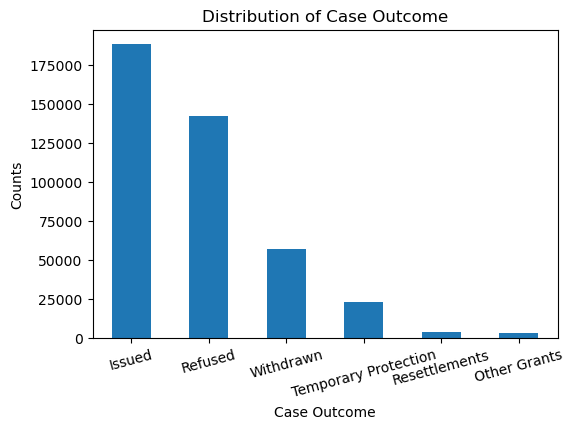

In [99]:
import matplotlib.pyplot as plt
case_outcome_counts = clean_df['Case outcome'].value_counts()
plt.figure(figsize=(6, 4)) 

case_outcome_counts.plot(kind='bar')
plt.title("Distribution of Case Outcome")
plt.xlabel("Case Outcome")
plt.ylabel("Counts")
plt.xticks(rotation=15)  
plt.show()

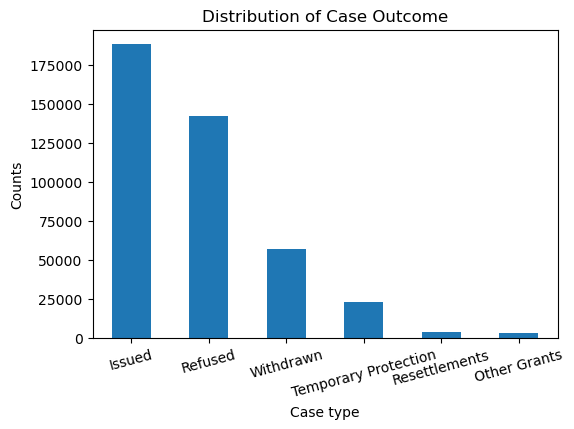

In [101]:
case_type_counts = clean_df['Case type'].value_counts()
plt.figure(figsize=(6, 4)) 

case_outcome_counts.plot(kind='bar')
plt.title("Distribution of Case Outcome")
plt.xlabel("Case type")
plt.ylabel("Counts")
plt.xticks(rotation=15)
plt.show()

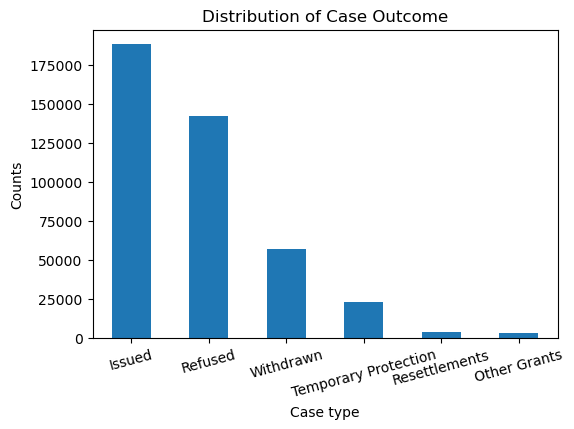

In [102]:
case_outcome_group_counts = clean_df['Case outcome group'].value_counts()
plt.figure(figsize=(6, 4)) 

case_outcome_counts.plot(kind='bar')
plt.title("Distribution of Case Outcome")
plt.xlabel("Case type")
plt.ylabel("Counts")
plt.xticks(rotation=15)
plt.show()

Checkout the shape of how many cells don't match from 'Case outcome group' and 'Case outcome'. The objective is to remove the group because it seems redundant.

In [103]:
clean_df[clean_df["Case outcome group"] != clean_df['Case outcome']].shape

(944952, 28)

checking rows where the values in the "Case outcome group" column do not match the values in the "Case outcome" column

In [104]:
clean_df[clean_df["Case outcome group"] != clean_df['Case outcome']].shape

(944952, 28)

Checking what the column looks like

There is a lot of unknowns still. We need to reduce that through imputations

To locate rows where "Case outcome group" is "unknown", and "Case outcome" is not "unknown".

We are trying to make sure they match as much as possible so we can delete group.

This code updates the values in "Case outcome group" to match the value in "Case outcome"

-  List named known_outcomes is created
-  Iterate over each outcome:
-  Find matches for each outcome (for specific known values (like 'Issued', 'Refused', etc.)
-  To find rows where both the 'Case outcome' and 'Case outcome group' columns match the current outcome
-  The length (number) of the matches dataframe, determined using len
-  "Case outcome" and "Case outcome group" columns in clean_df to check if they match 

In [105]:
known_outcomes = ['Issued', 'Refused', 'Withdrawn', 'Refugee Permission', 'Resettlements']

for outcome in known_outcomes:
    matches = clean_df[(clean_df['Case outcome'] == outcome) & 
                       (clean_df['Case outcome group'] == outcome)]
    print(f"Matches for {outcome}: {len(matches)}")


Matches for Issued: 0
Matches for Refused: 51105
Matches for Withdrawn: 16668
Matches for Refugee Permission: 0
Matches for Resettlements: 0


- Iterate over a list of specific case outcomes 
- Calculate the number of rows where the values in both the 'Case outcome' and 'Case outcome group' columns
- To match to the outcomes in the list

In [ ]:
known_outcomes = ['Issued', 'Refused', 'Withdrawn', 'Refugee Permission', 'Resettlements']

for outcome in known_outcomes:
    matches = clean_df[(clean_df['Case outcome'].str.lower() == outcome.lower()) & 
                       (clean_df['Case type'].str.lower() == outcome.lower())]
    print(f"Matches for {outcome}: {len(matches)}")


In [46]:
# Convert both columns to lowercase for case-insensitive comparison
clean_df['Case outcome lower'] = clean_df['Case outcome'].str.lower()
clean_df['Case outcome group lower'] = clean_df['Case outcome group'].str.lower()

# Check matches and mismatches
matches = clean_df[clean_df['Case outcome lower'] == clean_df['Case outcome group lower']]
mismatches = clean_df[clean_df['Case outcome lower'] != clean_df['Case outcome group lower']]

print(f"Total matches: {len(matches)}")
print(f"Total mismatches: {len(mismatches)}")


C:\Users\patri\AppData\Local\Temp\ipykernel_14624\2375515491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Case outcome lower'] = clean_df['Case outcome'].str.lower()
C:\Users\patri\AppData\Local\Temp\ipykernel_14624\2375515491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Case outcome group lower'] = clean_df['Case outcome group'].str.lower()


Total matches: 946934
Total mismatches: 70882


Review some mismatched rows to understand the discrepancy

In [72]:
print(mismatches[['Case outcome', 'Case outcome group']].sample(25))


NameError: name 'mismatches' is not defined

- Locate rows where "Case outcome" is 'Unknown'
- but the "Case outcome group" is populated with a specific outcome (not 'Unknown')
- For these rows, the value in "Case outcome" is replaced with the corresponding value from "Case outcome group". 
- Update "Case outcome" to match "Case outcome group".

In [49]:
clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case outcome group"].str.lower() != 'unknown'),
    "Case outcome"
] = clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case outcome group"].str.lower() != 'unknown'),
    "Case outcome group"
]

Checking again for after update 

In [50]:
print(clean_df["Case outcome"].value_counts())

matches_after1 = clean_df[clean_df['Case outcome'].str.lower() == clean_df['Case outcome group'].str.lower()]
mismatches_after1 = clean_df[clean_df['Case outcome'].str.lower() != clean_df['Case outcome group'].str.lower()]

print(f"After update, total matches: {len(matches_after1)}")
print(f"After update, total mismatches: {len(mismatches_after1)}")


Case outcome
Unknown                 603968
Issued                  177645
Refused                 142453
Withdrawn                59637
Refugee Permission       21773
Grant of Other Leave      8866
Resettlements             3264
Grant of Protection        210
Name: count, dtype: int64
After update, total matches: 990056
After update, total mismatches: 27760


if case == issued and case outcome == group then case outcome == refugee permission
Now reviewing some mismatched rows to understand the discrepancy

In [90]:
print(mismatches_after1[['Case outcome', 'Case outcome group']].sample(10))

              Case outcome   Case outcome group
129706  Refugee Permission  Grant of Protection
468981  Refugee Permission  Grant of Protection
31978   Refugee Permission  Grant of Protection
937146  Refugee Permission  Grant of Protection
851768  Refugee Permission  Grant of Protection
596958  Refugee Permission  Grant of Protection
762758  Refugee Permission  Grant of Protection
410077  Refugee Permission  Grant of Protection
573858  Refugee Permission  Grant of Protection
782143       Resettlements  Grant of Protection


Only grant of protection seems to be - so we can drop this 

In [91]:
clean_df = clean_df.drop(columns=['Case outcome group'])

In [ ]:
# note this is going to be key encoding
#so first make a data frame with all necesary data and get rid of as many unknowns as possible


In [94]:
clean_df['Case type'].value_counts()

Case type
Unknown              910451
asylum case          103904
resettlement case      3461
Name: count, dtype: int64

In [46]:
import pandas as pd
import numpy as np

aggregated = clean_df.groupby('Case type')['Total Application and Decisions'].agg(
    Min='min',
    Max='max',
    Average='mean',
)

print(aggregated)


                   Min       Max    Average  Median
Case type                                          
Unknown            0.0  234827.0  57.708576     1.0
asylum case        1.0    2940.0   9.223687     2.0
resettlement case  1.0    1561.0  15.548396     2.0


LAST

In [95]:
# Perform the update first
clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case type"].str.lower() != 'unknown'),
    "Case outcome"
] = clean_df.loc[
    (clean_df["Case outcome"].str.lower() == 'unknown') & 
    (clean_df["Case type"].str.lower() != 'unknown'),
    "Case type"
]

# Recalculate the "Case outcome" and "Case type" alignment for specified types
specified_types = ['asylum case', 'resettlement case']

for case_type in specified_types:
    # Matches where "Case outcome" now aligns with "Case type"
    matches = clean_df[(clean_df['Case outcome'].str.lower() == case_type) & 
                       (clean_df['Case type'].str.lower() == case_type)]
    
    # Mismatches where "Case outcome" does not align with "Case type"
    mismatches = clean_df[(clean_df['Case outcome'].str.lower() != case_type) & 
                          (clean_df['Case type'].str.lower() == case_type)]
    
    print(f"Matches for {case_type}: {len(matches)}")
    print(f"Mismatches for {case_type}: {len(mismatches)}")


Unique values in 'Case Outcome':
 ['Grant of Other Leave' 'Refugee Permission' 'Refused' 'Withdrawn'
 'Unknown' 'Issued' 'Resettlements' 'Grant of Protection']

Unique values in 'Case Type':
 ['asylum case' 'Unknown' 'resettlement case']


<div id='Visa_Outcomes'></div>

### Observation x: Visa Outcomes

In [75]:
clean_df['Visa type group'].value_counts()

Visa type group
Unknown                         711333
work                             93704
study                            59550
other                            59218
family                           44233
visitor                          32570
dep. joining or accompanying     17208
Name: count, dtype: int64

## Age

<div id='Age'></div>

In [76]:
clean_df['Age'].value_counts()

Age
Unknown     511524
30 to 49    173742
18 to 29    157530
Under 18     85105
50 to 69     72644
70+          17271
Name: count, dtype: int64

In [10]:
# Filter for rows where 'Visa type group' is 'study' and 'Age' is not 'Unknown'
filtered_rows = clean_df[(clean_df['Visa type group'] == 'study') & (clean_df['Visa type group'] != 'Unknown')]

# Select and display the 'Visa type group' and 'Age' columns from these filtered rows
selected_columns = filtered_rows[['Visa type group', 'Age']]

# Display the result
print(selected_columns)


       Visa type group      Age
27917            study  Unknown
27918            study  Unknown
27919            study  Unknown
27920            study  Unknown
27938            study  Unknown
...                ...      ...
994557           study  Unknown
994558           study  Unknown
994559           study  Unknown
994560           study  Unknown
994561           study  Unknown

[59550 rows x 2 columns]


In [11]:
clean_df.loc[(clean_df['Age'].str.lower() == 'unknown') & (clean_df['Visa type group'] == 'study'), 'Age'] = '18 to 29'

In [13]:
# If you still need to filter and display specific rows afterwards:
# Filter for rows where 'Visa type group' is 'study' and 'Age' is not 'Unknown'
filtered_rows = clean_df[(clean_df['Visa type group'] == 'study') & (clean_df['Age'].str.lower() != 'unknown')]

# Select and display the 'Visa type group' and 'Age' columns from these filtered rows
selected_columns = filtered_rows[['Visa type group', 'Age']]

# Display the result
print(selected_columns)

       Visa type group       Age
27917            study  18 to 29
27918            study  18 to 29
27919            study  18 to 29
27920            study  18 to 29
27938            study  18 to 29
...                ...       ...
994557           study  18 to 29
994558           study  18 to 29
994559           study  18 to 29
994560           study  18 to 29
994561           study  18 to 29

[59550 rows x 2 columns]


In [3]:
clean_df.head()

NameError: name 'clean_df' is not defined

In [18]:
#Unaccompanied Asylum Seeking Children (UASC) if uasc - age = children

clean_df['UASC'].value_counts()

UASC
Unknown    1004864
uasc         12952
Name: count, dtype: int64

In [ ]:
# Ensure all data is string for uniform processing
df_combined['UASC'] = df_combined['UASC'].astype(str).str.lower().str.strip()

# Replace specific values as per the requirements
df_combined['UASC'] = df_combined['UASC'].replace({
    'non-uasc': 'Registered Case',  # Convert 'Non-UASC' to 'Registered Case'
    'total (pre-2006)': 'Unknown',  # Convert 'Total (pre-2006)' to 'Unknown'
})

# Assuming 'UASC' remains unchanged, we only need to handle unspecified or other values.
# Since we already know all specific cases, we convert any other values not matched above to 'Unknown'.
# Note: 'UASC' and other known statuses should be explicitly listed to avoid being overwritten.
known_statuses = ['registered case', 'unknown', 'uasc']
df_combined['UASC'] = df_combined['UASC'].apply(
    lambda x: x if x in known_statuses else 'Unknown'
)


In [25]:
# Corrected example of filtering rows based on conditions for "UASC" and "Age"
filtered_rows2 = clean_df.loc[(clean_df["UASC"].str.lower() != 'unknown') & (clean_df['Age'].str.lower() != 'unknown')]

# Display the filtered DataFrame
print(filtered_rows2)


        Year  Quarter  Nationality              Region Return type group  \
191736  2009        1  Afghanistan        Asia Central           unknown   
191737  2009        1  Afghanistan        Asia Central           unknown   
191739  2009        1  Afghanistan        Asia Central           unknown   
191741  2009        1  Afghanistan        Asia Central           unknown   
191745  2009        1  Afghanistan        Asia Central           unknown   
...      ...      ...          ...                 ...               ...   
998791  2023        3       Turkey        Europe Other           unknown   
998805  2023        3       Uganda  Africa Sub-Saharan           unknown   
998866  2023        3      Vietnam     Asia South East           unknown   
998869  2023        3      Vietnam     Asia South East           unknown   
998888  2023        3        Yemen         Middle East           unknown   

       Return type       Age  Sex Return destination group  Number of returns  \
191736

In [26]:
clean_df.loc[(clean_df['Age'].str.lower() == 'unknown') & (clean_df['UASC'] == 'uasc'), 'Age'] = 'Under 18'

In [27]:
clean_df['Age'].value_counts()


Age
Unknown     449985
18 to 29    217080
30 to 49    173742
Under 18     87094
50 to 69     72644
70+          17271
Name: count, dtype: int64

In [ ]:
# Define the list of known groups
known_groups = ['Refused', 'Grant of Protection', 'Withdrawn', 'Grant of Other Leave']

# Use `.where()` to keep the value if it's in known_groups, else replace with 'Unknown'
df_combined['Case outcome group'] = df_combined['Case outcome group'].where(df_combined['Case outcome group'].isin(known_groups), other='Unknown')


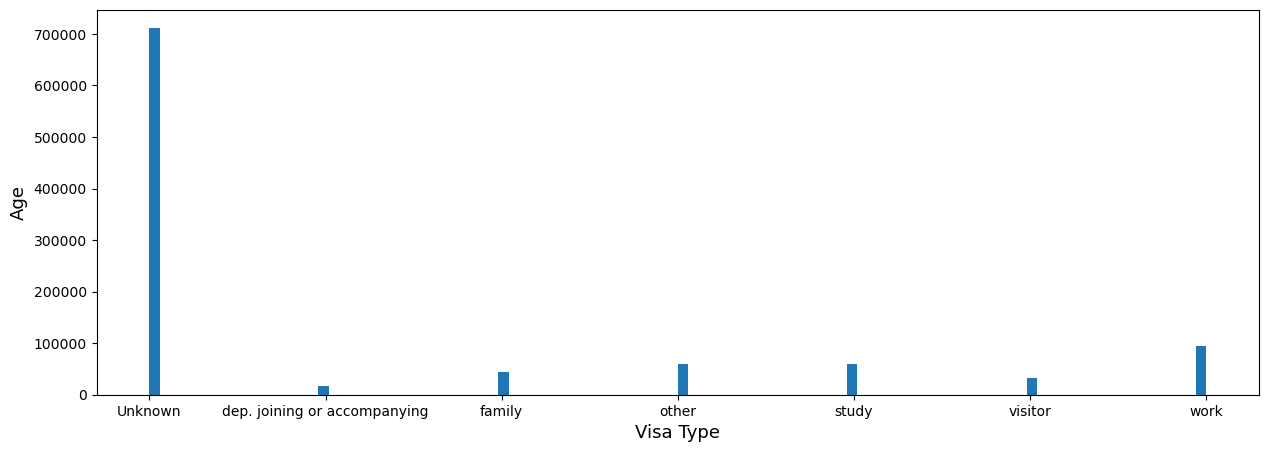

In [81]:
plt.figure(figsize=(15,5))
plt.hist(clean_df['Visa type group'], bins = 100)
plt.ylabel("Age", size=13)
plt.xlabel("Visa Type", size=13)
plt.show()



1) Select only numeric columns for scaling
2) Initialize the StandardScaler
3) Create a new DataFrame from the scaled data with the original numeric column names

In [43]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming clean_df is already defined
numeric_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit StandardScaler on the numeric columns
my_ss = StandardScaler()
X = my_ss.fit_transform(clean_df[numeric_cols])

# Create a DataFrame from the scaled data
clean_df_scaled = pd.DataFrame(data=X, columns=numeric_cols)

# Apply log transformation only to the numeric columns, adding 1 to avoid log(0)
log_transformed = np.log(clean_df[numeric_cols] + 1)



In [2]:
import pandas as pd

# Detention costs data
data = {
    "Year_Quarter": [
        "2013 Q1", "2013 Q2", "2013 Q3", "2013 Q4",
        "2014 Q1", "2014 Q2", "2014 Q3", "2014 Q4",
        "2015 Q1", "2015 Q2", "2015 Q3", "2015 Q4",
        "2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4",
        "2017 Q1", "2017 Q2", "2017 Q3", "2017 Q4",
        "2018 Q1", "2018 Q2", "2018 Q3", "2018 Q4",
        "2019 Q1", "2019 Q2", "2019 Q3", "2019 Q4",
        "2020 Q1", "2020 Q2", "2020 Q3", "2020 Q4",
        "2021 Q1", "2021 Q2", "2021 Q3", "2021 Q4",
        "2022 Q1", "2022 Q2", "2022 Q3", "2022 Q4",
        "2023 Q1", "2023 Q2", "2023 Q3"
    ],
    "Cost": [
        102.00, 100.00, 100.00, 100.00, 98.00, 98.70, 97.10, 96.16,
        92.67, 91.61, 90.41, 90.59, 89.93, 88.46, 87.63, 86.08,
        85.47, 85.53, 85.92, 85.97, 86.92, 87.52, 88.29, 87.71,
        88.68, 90.21, 91.34, 95.49, 96.86, 97.54, 99.56, 96.66,
        101.17, 98.78, 101.42, 101.61, 107.23, 113.16, 115.32, 120.42,
        112.85, 107.71, 104.99
    ]
}
detention_costs_df = pd.DataFrame(data)
# Split 'Year_Quarter' into 'Year' and 'Quarter'
detention_costs_df['Year'] = detention_costs_df['Year_Quarter'].str.split().str[0].astype(int)
detention_costs_df['Quarter'] = detention_costs_df['Year_Quarter'].str.split().str[1].replace({'Q1': '1', 'Q2': '2', 'Q3': '3', 'Q4': '4'})

# Merge preparation
clean_df['Quarter'] = clean_df['Quarter'].astype(str)  # Ensure Quarter is string for consistency

# Merging
clean_df_merged = pd.merge(clean_df, detention_costs_df, how='left', on=['Year', 'Quarter'])


#REF: #REF: https://migrationobservatory.ox.ac.uk/resources/briefings/immigration-detention-in-the-uk/

NameError: name 'clean_df' is not defined

In [ ]:
clean_df_merged.head()

In [ ]:
DT_02: Average cost per day to hold an individual in immigration detention1,B
Back to Contents

 	 
Quarter	Cost
2013 Q1	£102.00
2013 Q2	£100.00
2013 Q3	£100.00
2013 Q4	£100.00
2014 Q1	£98.00
2014 Q2	£98.70
2014 Q3	£97.10
2014 Q4	£96.16
2015 Q1	£92.67
2015 Q2	£91.61
2015 Q3	£90.41
2015 Q4	£90.59
2016 Q1	£89.93
2016 Q2	£88.46
2016 Q3	£87.63
2016 Q4	£86.08
2017 Q1	£85.47
2017 Q2	£85.53
2017 Q3	£85.92
2017 Q4	£85.97
2018 Q1	£86.92
2018 Q2	£87.52
2018 Q3	£88.29
2018 Q4	£87.71
2019 Q1	£88.68
2019 Q2	£90.21
2019 Q3	£91.34
2019 Q4	£95.49
2020 Q1	£96.86
2020 Q2	£97.54
2020 Q3	£99.56
2020 Q4	£96.66
2021 Q1	£101.17
2021 Q2	£98.78
2021 Q3	£101.42
2021 Q4	£101.61
2022 Q1	£107.23
2022 Q2	£113.16
2022 Q3	£115.32
2022 Q4	£120.42
2023 Q1	£112.85
2023 Q2	£107.71
2023 Q3	£104.99




In [95]:
<div id='EDA_Forward'></div>

### Observation x: Initial Conclusion for EDA and Foward

UASC
Unknown    1010181
uasc         13220
Name: count, dtype: int64

In [ ]:
1) The Average_Score of ~8.4 suggests that the average hotel score seems high and it appears this hotel is well reviewed
2) The Reviewer_Score average of ~0.57 suggests a relatively positive sentiment
3) Additional Score is probably not useful
4) We can remove many columns from our dataframe that we won't be using moving forward, like all the locations
5) There is a significant amount of "No Negative" and "No Positive", so many reviewers didn't leave reviews
6) Reviews generally look to be short as well, hence the large right skew
7) Moving forward, in preprocessing, we can refine the dataframe even more by reducing the columns we don't need
8) As well, we can use parametres to remove useless data and optimize the dataframe even more


### Baseline Modelling: Logistic Regression

<div id='B_Modelling'></div>

In [ ]:
# hide warnings - we will be using default parameter values
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

str_cols = clean_df.select_dtypes(include=['object'])
mask_str = ~(str_cols.apply(lambda x: x.str.lower()).isin(['unknown']).any(axis=1))

num_cols = clean_df.select_dtypes(include=['int64', 'float64'])
mask_num = ~(num_cols.isin([0]).any(axis=1))

# Combine masks to get a mask for rows to keep
mask_combined = mask_str & mask_num

clean_df_no_unknown_or_zero = clean_df.loc[mask_combined]

clean_df_no_unknown_or_zero.info()


In [ ]:
cols_with_unknown = clean_df.apply(lambda x: x.astype(str).str.lower().str.contains('unknown').any(), axis=0)
cols_with_unknown = cols_with_unknown[cols_with_unknown].index.tolist()

cols_with_zero = clean_df.select_dtypes(include=['int64', 'float64']).apply(lambda x: (x==0).any(), axis=0)
cols_with_zero = cols_with_zero[cols_with_zero].index.tolist()

# Combine the lists, ensuring uniqueness
cols_of_interest = list(set(cols_with_unknown + cols_with_zero))

clean_df_c = clean_df[cols_of_interest].copy()

clean_df_c.info()